# Import Data and Required Packages

In [1]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

# Reading the data

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)


In [3]:
# Drop rows
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [4]:
data.loc[:122, 'region'] = 'bejaia'
data.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [5]:
#Stripping the names of the columns

data.columns = [i.strip() for i in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [6]:
#Stripping the Classes Features data

data.Classes = data.Classes.str.strip()
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# 1. I need to understand the dataset

In [7]:
#displaying first 5 rows of dataset
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [8]:
#displaying last 5 rows of dataset
data.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [9]:
#know the datatypes
data.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region         object
dtype: object

# Changing The DataTypes of the Columns

In [10]:
data['day']=data['day'].astype(int)
data['month']=data['month'].astype(int)
data['year']=data['year'].astype(int)
data['Temperature']=data['Temperature'].astype(int)
data['RH']=data['RH'].astype(int)
data['Rain']=data['Rain'].astype(float)
data['FFMC']=data['FFMC'].astype(float)
data['DMC']=data['DMC'].astype(float)
data['BUI']=data['BUI'].astype(float)
data['ISI']=data['ISI'].astype(float)
data['Ws']=data['Ws'].astype(float)



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [11]:
#displaying the shape of dataset : No. of rows and No. of columns
data.shape

(244, 15)

In [12]:
#getting overall statistics about the dataframe
data.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,127,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire,bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,137,122
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN,NaN


In [13]:
# how many columns are in the dataframe
data.columns
#there are spaces after the Rain and Classes columns so i rename to take out spaces

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [14]:
#renaming column names so as to remove spaces nehind
 
data.rename(columns={'Rain ': 'Rain', 'Classes  ': 'classes'}, inplace=True)

In [15]:
data.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          2
region           2
dtype: int64

# 2. Cleaning the data

In [17]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia


In [18]:
#checking for null values.
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

*Getting One Null Value.

In [21]:
#dropped the year and classes attribute as the fires all occured in the same year (2012)
#i dropped classes too as i couldnt compare variables 
data = data.drop(['year', 'Classes'], axis=1)

In [22]:
#check after droppping year attribute

data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,bejaia
1,2,6,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,bejaia
2,3,6,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,bejaia
3,4,6,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,bejaia
4,5,6,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,bejaia


In [23]:
# Done cleaning the dataset

In [24]:
#relationship analysis

<AxesSubplot:>

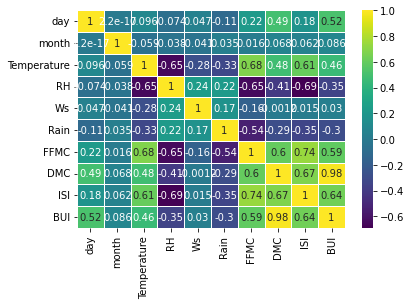

In [29]:
#HEATMAP

#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#using a correlation heatmap to view rlationship between variables
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=.5)

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

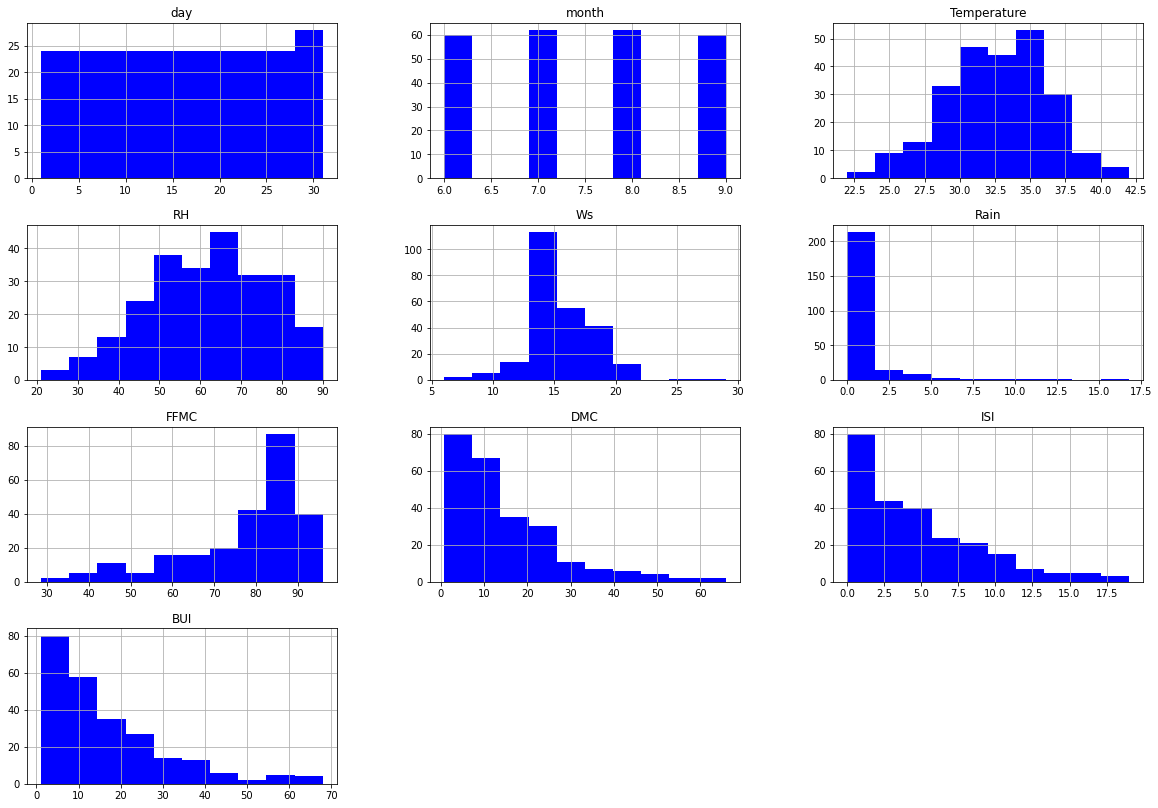

In [31]:
#HISTOGRAM

#A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical 
#representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis 
#gives information about frequency.
data.hist(figsize=(20,14),color='b')

<AxesSubplot:xlabel='Temperature', ylabel='day'>

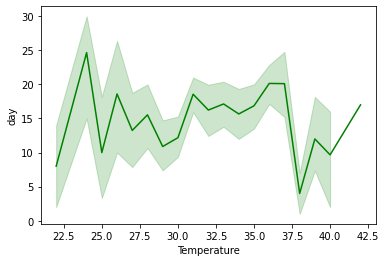

In [33]:
#LINEPLOT
#A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency
#of each value.

sns.lineplot(x='Temperature',y='day',data=data,color='g')

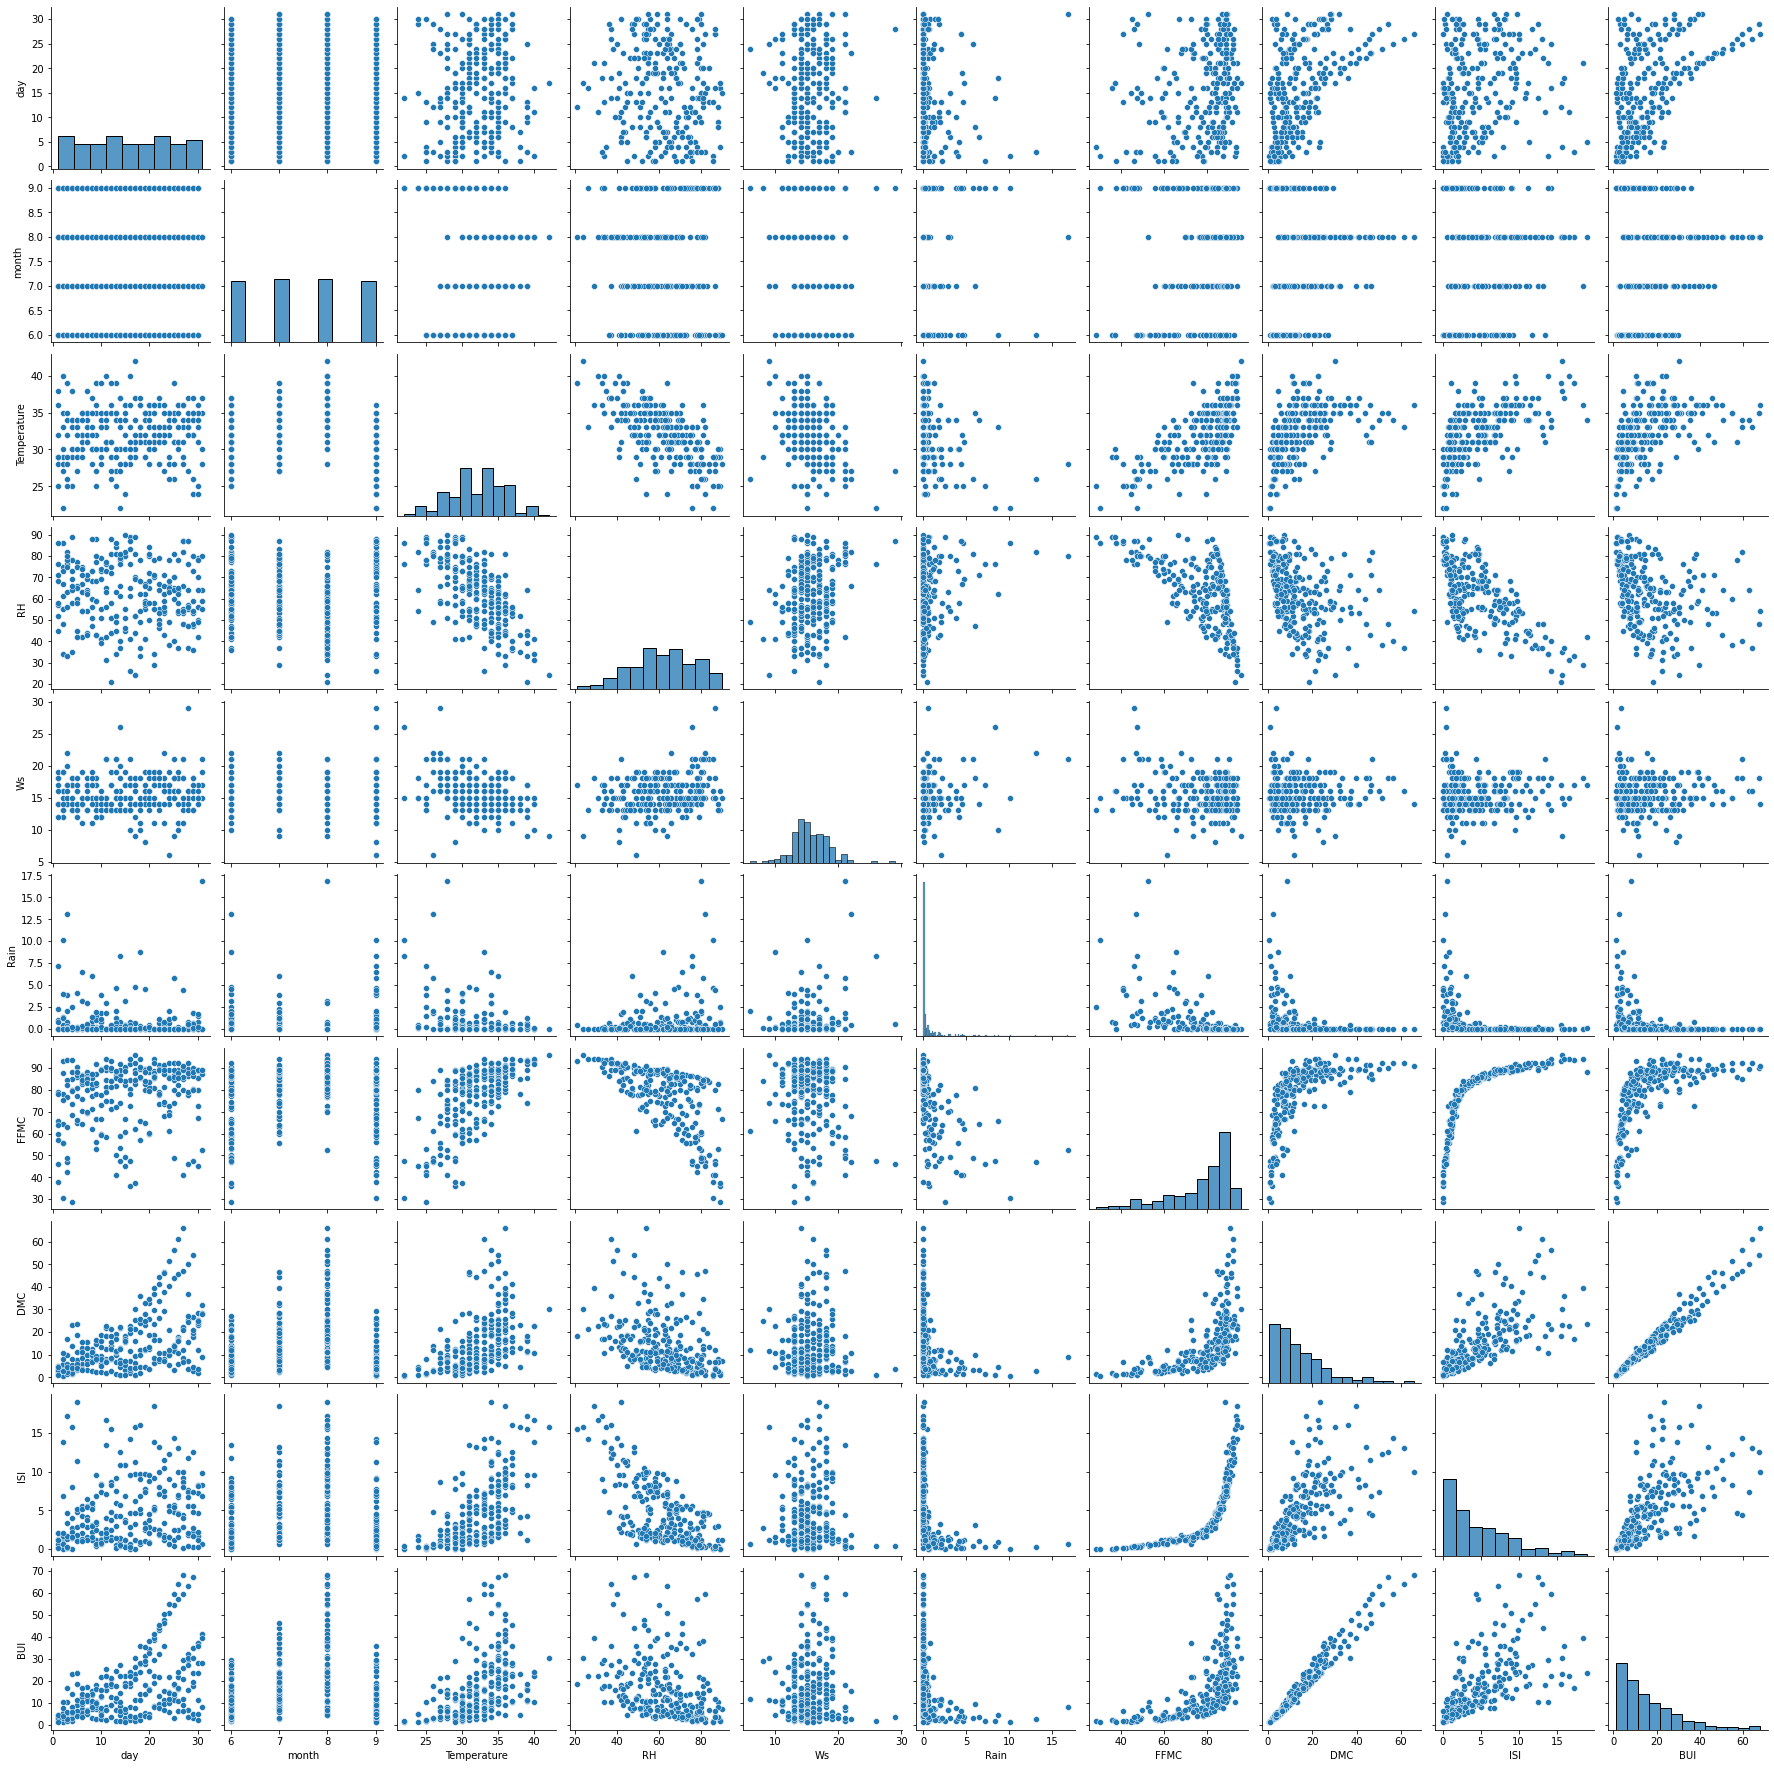

In [35]:
#PAIRPLOT

#A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in
#data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(data)

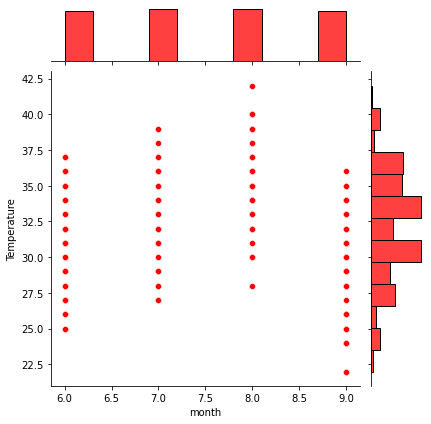

In [37]:
#JOINTPLOT

#Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.
#This plot is a convenience class that wraps JointGrid.

sns.jointplot(x='month',y='Temperature',data=data,color='r')

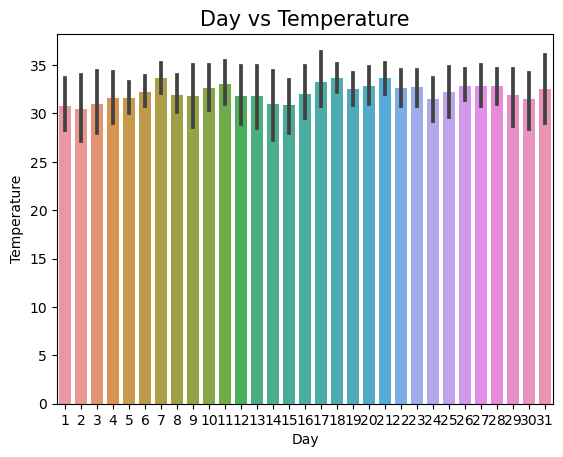

In [39]:
#Barplot

plt.style.use("default")
sns.barplot(x="day", y="Temperature",data=data)
plt.title("Day vs Temperature",fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

<AxesSubplot:xlabel='day', ylabel='Temperature'>

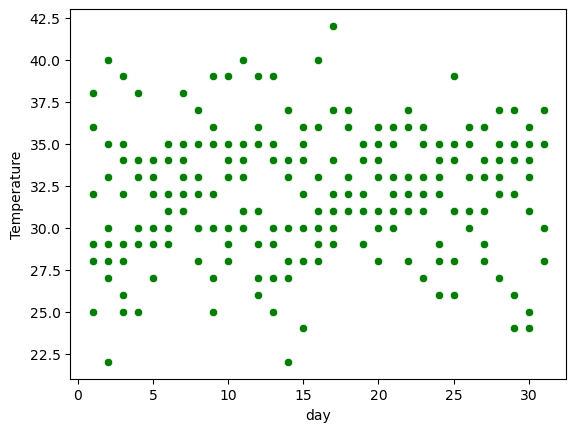

In [41]:
sns.scatterplot(x='day',y='Temperature',data=data,color='g')

# Questions

In [42]:
#What is the highest temperature in the dataset
data.Temperature.max()

42

In [43]:
#What is the lowest temperature in the dataset
data.Temperature.min()

22

In [44]:
#When did it rain the most
#the 31st day in the 8th month with 16.8mm of rainfall
highest_rain = data.sort_values(by='Rain', ascending=False)[['Rain', 'day','month']].head(1)
highest_rain

,Rain,day,month
91,16.8,31,8


In [45]:
#What did it rain the least
#the 6th month with 0.0mm of rainfall
lowest_rain = data.sort_values(by='Rain', ascending=True)[['Rain', 'day', 'month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


In [46]:
#What month is the hottest
#the 8th month
highest_month = data.sort_values(by='Temperature', ascending=False)[['month']].head(1)
highest_month

,month
199,8


In [47]:
#what day has the highest temperature in the dataset?
#The highest Temperature is 42 degrees and it occured on the 17th of  the 8th Month).
highest_temp = data.sort_values(by='Temperature', ascending=False)[['Temperature','day','month']].head(1)
highest_temp

,Temperature,day,month
199,42,17,8


In [48]:
highest_temp = data.sort_values(by='Temperature', ascending=False)[['Temperature', 'day','month', 'Rain']].head(1)

lowest_temp =  data.sort_values(by='Temperature', ascending=True)[['Temperature', 'day','month', 'Rain']].head(1)

print("Highest Temperatures")
print(highest_temp)

print()

print("Lowest Temperatures")
print(lowest_temp)

Highest Temperatures
     Temperature  day  month  Rain
199           42   17      8   0.0

Lowest Temperatures
     Temperature  day  month  Rain
105           22   14      9   8.3


In [50]:
# we create a list of features we want

features = ['Temperature', 'day']
X = data[features]
y = data["month"]

In [51]:
X.head()

,Temperature,day
0,29,1
1,29,2
2,26,3
3,25,4
4,27,5


In [52]:
X.describe()

,Temperature,day
count,244.000000,244.000000
mean,32.172131,15.754098
std,3.633843,8.825059
min,22.000000,1.000000
25%,30.000000,8.000000
50%,32.000000,16.000000
75%,35.000000,23.000000
max,42.000000,31.000000


In [54]:
!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [55]:
#Modelling


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [56]:
# Define model. Specify a number for random_state to ensure same results each run

#DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [57]:
print("Making predictions for days:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for days:
   Temperature  day
0           29    1
1           29    2
2           26    3
3           25    4
4           27    5
The predictions are
[7.33333333 6.         6.         6.         6.        ]


In [58]:
# randomforestregressor
# Define model. Specify a number for random_state to ensure same results each run

forest_model = RandomForestRegressor(random_state=1)

# Fit model
forest_model.fit(X, y)

print("Making Temperature predictions for")
print(X.head())
print("The predictions are")
print(forest_model.predict(X.head()))

Making Temperature predictions for
   Temperature  day
0           29    1
1           29    2
2           26    3
3           25    4
4           27    5
The predictions are
[7.32925    6.44166667 6.72       6.78       6.2       ]


In [59]:
# XGBoost regressor
xg_model = XGBRegressor(random_state=1)

# Fit model
xg_model.fit(X, y)

print("Making predictions for days")
print(X.head())
print("The predictions are")
print(xg_model.predict(X.head()))

Making predictions for days
   Temperature  day
0           29    1
1           29    2
2           26    3
3           25    4
4           27    5
The predictions are
[7.3087783 6.0567575 6.016151  6.00891   5.999456 ]
